In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
df = pd.read_csv('/Users/sid/Code/PAoffensiveclustering/fbref_stats_2023-2024/player stats/Player_Shooting.csv')
min_df = pd.read_csv('/Users/sid/Code/PAoffensiveclustering/fbref_stats_2023-2024/player stats/Player_Playing_Time.csv')
pos_df = pd.read_csv('/Users/sid/Code/PAoffensiveclustering/fbref_stats_2023-2024/player stats/Player_Possession.csv')
misc_df = pd.read_csv('/Users/sid/Code/PAoffensiveclustering/fbref_stats_2023-2024/player stats/Player_Miscellaneous.csv')
pass_df = pd.read_csv('/Users/sid/Code/PAoffensiveclustering/fbref_stats_2023-2024/player stats/Player_Passing.csv')
goal_shot_df = pd.read_csv('/Users/sid/Code/PAoffensiveclustering/fbref_stats_2023-2024/player stats/Player_Goal_Shot_Creation.csv')



In [78]:

print(df.columns)
print(min_df.columns)
print(pos_df.columns)
print(misc_df.columns)
print(goal_shot_df.columns)

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'Standard Gls', 'Standard Sh', 'Standard SoT', 'Standard SoT%',
       'Standard Sh/90', 'Standard SoT/90', 'Standard G/Sh', 'Standard G/SoT',
       'Standard Dist', 'Standard FK', 'Standard PK', 'Standard PKatt',
       'Expected xG', 'Expected npxG', 'Expected npxG/Sh', 'Expected G-xG',
       'Expected np:G-xG'],
      dtype='object')
Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born',
       'Playing Time MP', 'Playing Time Min', 'Playing Time Mn/MP',
       'Playing Time Min%', 'Playing Time 90s', 'Starts Starts',
       'Starts Mn/Start', 'Starts Compl', 'Subs Subs', 'Subs Mn/Sub',
       'Subs unSub', 'Team Success PPM', 'Team Success onG',
       'Team Success onGA', 'Team Success +/-', 'Team Success +/-90',
       'Team Success On-Off', 'Team Success (xG) onxG',
       'Team Success (xG) onxGA', 'Team Success (xG) xG+/-',
       'Team Success (xG) xG+/-90', 'Team Success (xG) On-Off'],
 

In [79]:
#check the average minutes per game
print(min_df['Playing Time Mn/MP'].mean())
#get list of players who average less than 25 minutes per game
players_less_than_25 = min_df[min_df['Playing Time Mn/MP'] < 25]




55.17068965517242


In [80]:
#drop these players from the shooting df
df = df[~df['Player'].isin(players_less_than_25['Player'])]

#drop duplicate players
df = df.drop_duplicates(subset='Player')
print(df.head())

   Rk            Player   Nation Pos        Squad  Age  Born   90s  \
0   1        Max Aarons  eng ENG  DF  Bournemouth   23  2000  13.7   
2   3       Tyler Adams   us USA  MF  Bournemouth   24  1999   1.3   
3   4  Tosin Adarabioyo  eng ENG  DF       Fulham   25  1997  18.0   
4   5    Elijah Adebayo  eng ENG  FW   Luton Town   25  1998  15.8   
5   6     Simon Adingra   ci CIV  FW     Brighton   21  2002  24.7   

   Standard Gls  Standard Sh  ...  Standard G/SoT  Standard Dist  Standard FK  \
0             0            2  ...             NaN           23.9            0   
2             0            0  ...             NaN            NaN            0   
3             2           14  ...            0.40           14.2            0   
4            10           31  ...            0.71            9.6            0   
5             6           52  ...            0.27           15.9            0   

   Standard PK  Standard PKatt  Expected xG  Expected npxG  Expected npxG/Sh  \
0           

In [81]:
#keep only players and Ast in the passing df, drop all other columns
pass_df = pass_df[['Player', 'Ast']]

print(pass_df.head())


              Player  Ast
0         Max Aarons    1
1  Joshua Acheampong    0
2        Tyler Adams    0
3   Tosin Adarabioyo    0
4     Elijah Adebayo    0


In [82]:
goal_shot_df = goal_shot_df[['Player', 'GCA GCA', 'SCA SCA']]

print(goal_shot_df.head())

              Player  GCA GCA  SCA SCA
0         Max Aarons        2       23
1  Joshua Acheampong        0        1
2        Tyler Adams        0        3
3   Tosin Adarabioyo        0       10
4     Elijah Adebayo        5       31


In [83]:
# Update the filter to handle both formats (with and without spaces)
df = df[df['Pos'].str.replace(' ', '').isin(['FW,MF', 'MF,FW', 'FW'])]

print(df.shape)
print(df.head(90))


(141, 25)
      Rk               Player   Nation    Pos            Squad  Age  Born  \
4      5       Elijah Adebayo  eng ENG     FW       Luton Town   25  1998   
5      6        Simon Adingra   ci CIV     FW         Brighton   21  2002   
18    19       Miguel Almirón   py PAR     FW    Newcastle Utd   29  1994   
20    21       Julián Álvarez   ar ARG  MF,FW  Manchester City   23  2000   
21    22         Zeki Amdouni   ch SUI     FW          Burnley   22  2000   
..   ...                  ...      ...    ...              ...  ...   ...   
353  354         Kaoru Mitoma   jp JPN     FW         Brighton   26  1997   
354  355  Aleksandar Mitrović   rs SRB     FW           Fulham   28  1994   
360  361       Carlton Morris  eng ENG  FW,MF       Luton Town   27  1995   
361  362          Mason Mount  eng ENG  MF,FW   Manchester Utd   24  1999   
363  364      Mykhailo Mudryk   ua UKR     FW          Chelsea   22  2001   

      90s  Standard Gls  Standard Sh  ...  Standard G/SoT  Standa

In [84]:
# Do the first three merges
df = df.merge(pos_df, on='Player', how='left', suffixes=('', '_pos'))
df = df.merge(misc_df, on='Player', how='left', suffixes=('', '_misc'))
df = df.merge(pass_df, on='Player', how='left', suffixes=('', '_pass'))

# Check columns
print("Columns after first three merges:", df.columns.tolist())

# Check goal_shot_df columns
print("\nGoal shot columns:", goal_shot_df.columns.tolist())

Columns after first three merges: ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Standard Gls', 'Standard Sh', 'Standard SoT', 'Standard SoT%', 'Standard Sh/90', 'Standard SoT/90', 'Standard G/Sh', 'Standard G/SoT', 'Standard Dist', 'Standard FK', 'Standard PK', 'Standard PKatt', 'Expected xG', 'Expected npxG', 'Expected npxG/Sh', 'Expected G-xG', 'Expected np:G-xG', 'Rk_pos', 'Nation_pos', 'Pos_pos', 'Squad_pos', 'Age_pos', 'Born_pos', '90s_pos', 'Touches Touches', 'Touches Def Pen', 'Touches Def 3rd', 'Touches Mid 3rd', 'Touches Att 3rd', 'Touches Att Pen', 'Touches Live', 'Take-Ons Att', 'Take-Ons Succ', 'Take-Ons Succ%', 'Take-Ons Tkld', 'Take-Ons Tkld%', 'Carries Carries', 'Carries TotDist', 'Carries PrgDist', 'Carries PrgC', 'Carries 1/3', 'Carries CPA', 'Carries Mis', 'Carries Dis', 'Receiving Rec', 'Receiving PrgR', 'Rk_misc', 'Nation_misc', 'Pos_misc', 'Squad_misc', 'Age_misc', 'Born_misc', '90s_misc', 'Performance CrdY', 'Performance CrdR', 'Performance 2Cr

In [85]:

df = df.merge(goal_shot_df, on='Player', how='left', suffixes=('', '_gsc'))

df_copy = df.copy()

print(df.head())

   Rk          Player   Nation    Pos            Squad  Age  Born   90s  \
0   5  Elijah Adebayo  eng ENG     FW       Luton Town   25  1998  15.8   
1   6   Simon Adingra   ci CIV     FW         Brighton   21  2002  24.7   
2  19  Miguel Almirón   py PAR     FW    Newcastle Utd   29  1994  21.5   
3  21  Julián Álvarez   ar ARG  MF,FW  Manchester City   23  2000  29.4   
4  22    Zeki Amdouni   ch SUI     FW          Burnley   22  2000  21.7   

   Standard Gls  Standard Sh  ...  Performance PKwon  Performance PKcon  \
0            10           31  ...                  0                  0   
1             6           52  ...                  1                  0   
2             3           41  ...                  0                  0   
3            11           96  ...                  2                  0   
4             5           48  ...                  1                  0   

   Performance OG  Performance Recov  Aerial Duels Won  Aerial Duels Lost  \
0               0    

In [86]:
print(df.head(90))
print(df.columns)

     Rk            Player   Nation    Pos            Squad  Age  Born   90s  \
0     5    Elijah Adebayo  eng ENG     FW       Luton Town   25  1998  15.8   
1     6     Simon Adingra   ci CIV     FW         Brighton   21  2002  24.7   
2    19    Miguel Almirón   py PAR     FW    Newcastle Utd   29  1994  21.5   
3    21    Julián Álvarez   ar ARG  MF,FW  Manchester City   23  2000  29.4   
4    22      Zeki Amdouni   ch SUI     FW          Burnley   22  2000  21.7   
..  ...               ...      ...    ...              ...  ...   ...   ...   
85  286     Luca Koleosho   it ITA  MF,FW          Burnley   18  2004  10.8   
86  292    Mohammed Kudus   gh GHA  FW,MF         West Ham   22  2000  27.6   
87  293  Dejan Kulusevski   se SWE  FW,MF        Tottenham   23  2000  30.7   
88  294      Adam Lallana  eng ENG  MF,FW         Brighton   35  1988   9.4   
89  317      Noni Madueke  eng ENG     FW          Chelsea   21  2002  11.7   

    Standard Gls  Standard Sh  ...  Performance PKw

In [87]:
# heatmap of shooting stats
#first drop columns Player, Nation, Pos, Squad, Age, Born
df = df.drop(columns=['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born'])

In [88]:
df = df.dropna()
df.isnull().sum()

df.shape

(157, 74)

In [89]:
# First, let's see what columns we actually have
print("Available columns:", df.columns.tolist())

Available columns: ['Rk', '90s', 'Standard Gls', 'Standard Sh', 'Standard SoT', 'Standard SoT%', 'Standard Sh/90', 'Standard SoT/90', 'Standard G/Sh', 'Standard G/SoT', 'Standard Dist', 'Standard FK', 'Standard PK', 'Standard PKatt', 'Expected xG', 'Expected npxG', 'Expected npxG/Sh', 'Expected G-xG', 'Expected np:G-xG', 'Rk_pos', 'Nation_pos', 'Pos_pos', 'Squad_pos', 'Age_pos', 'Born_pos', '90s_pos', 'Touches Touches', 'Touches Def Pen', 'Touches Def 3rd', 'Touches Mid 3rd', 'Touches Att 3rd', 'Touches Att Pen', 'Touches Live', 'Take-Ons Att', 'Take-Ons Succ', 'Take-Ons Succ%', 'Take-Ons Tkld', 'Take-Ons Tkld%', 'Carries Carries', 'Carries TotDist', 'Carries PrgDist', 'Carries PrgC', 'Carries 1/3', 'Carries CPA', 'Carries Mis', 'Carries Dis', 'Receiving Rec', 'Receiving PrgR', 'Rk_misc', 'Nation_misc', 'Pos_misc', 'Squad_misc', 'Age_misc', 'Born_misc', '90s_misc', 'Performance CrdY', 'Performance CrdR', 'Performance 2CrdY', 'Performance Fls', 'Performance Fld', 'Performance Off', 'Per

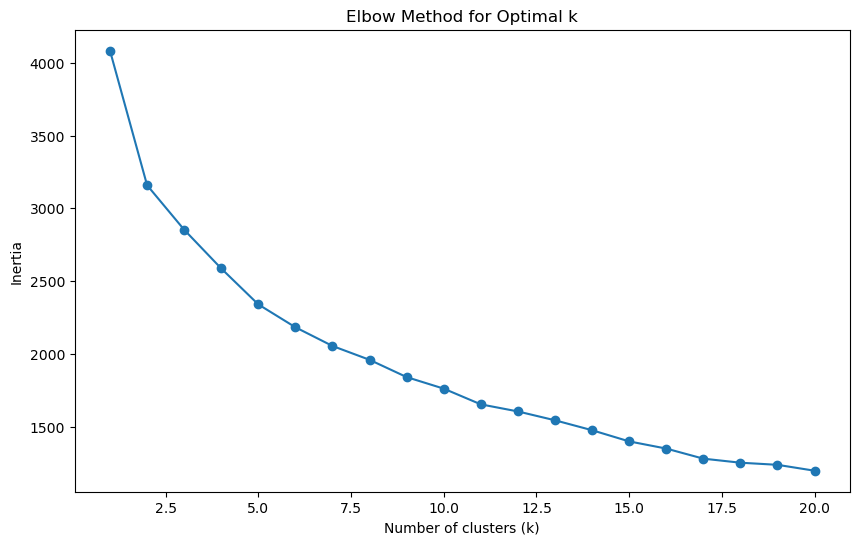

In [99]:
# Scale the data for K-means clustering
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
predictor_features = [
    'Standard Gls',
    'Standard Sh/90', 'Standard SoT/90', 'Standard G/Sh', 'Standard G/SoT', 
    'Standard Dist', 'Standard FK', 'Standard PK', 'Standard PKatt',
    'Expected xG', 'Expected npxG', 'Expected npxG/Sh', 
    'Expected G-xG', 'Expected np:G-xG',
    'Touches Mid 3rd', 'Touches Att 3rd', 'Touches Att Pen',
    'Take-Ons Succ%', 'Carries PrgC', 'Carries CPA',
    'Performance Fls', 'Performance Crs', 'Performance TklW',
    'Ast', 'GCA GCA', 'SCA SCA'
]

# Create feature matrix
X = df[predictor_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=predictor_features)

# Now let's find optimal k using elbow method
from sklearn.cluster import KMeans
inertias = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

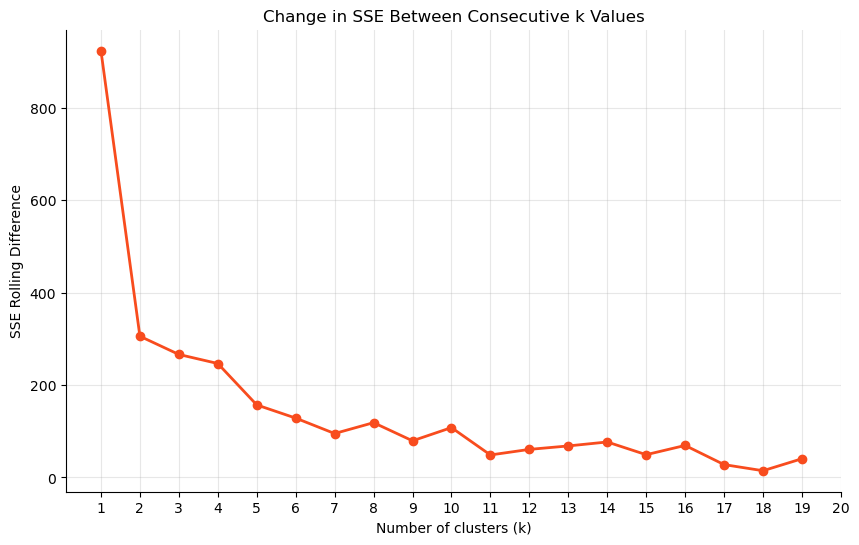

In [100]:
import numpy as np
import pandas as pd

# Create DataFrame with k and inertia values
df_elbow = pd.DataFrame({
    'k': range(1, 21),
    'inertia': inertias
})

# Calculate the difference between consecutive inertia values
df_elbow['inertia_diff'] = df_elbow['inertia'].diff(-1) 

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'][:-1], df_elbow['inertia_diff'][:-1], marker='o', 
         color='#F84C1E', linestyle='-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE Rolling Difference')
plt.title('Change in SSE Between Consecutive k Values')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21))

# Customize the appearance to match the minimal theme
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

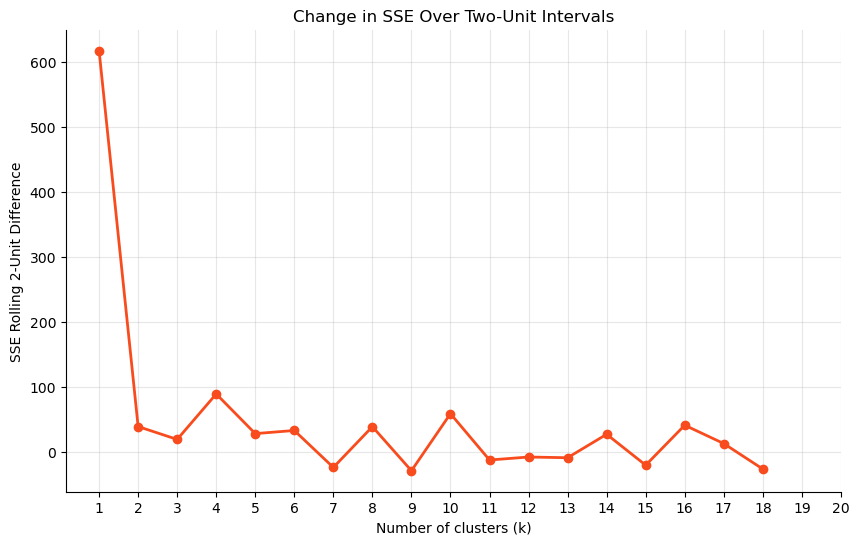

In [101]:
# Create DataFrame with k and inertia values
df_elbow = pd.DataFrame({
    'k': range(1, 21),
    'inertia': inertias
})

# Calculate the two-unit rolling difference
df_elbow['inertia_diff_2'] = df_elbow['inertia'] - 2 * df_elbow['inertia'].shift(-1) + df_elbow['inertia'].shift(-2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'][:-2], df_elbow['inertia_diff_2'][:-2], marker='o', 
         color='#F84C1E', linestyle='-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE Rolling 2-Unit Difference')
plt.title('Change in SSE Over Two-Unit Intervals')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21))

# Customize the appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

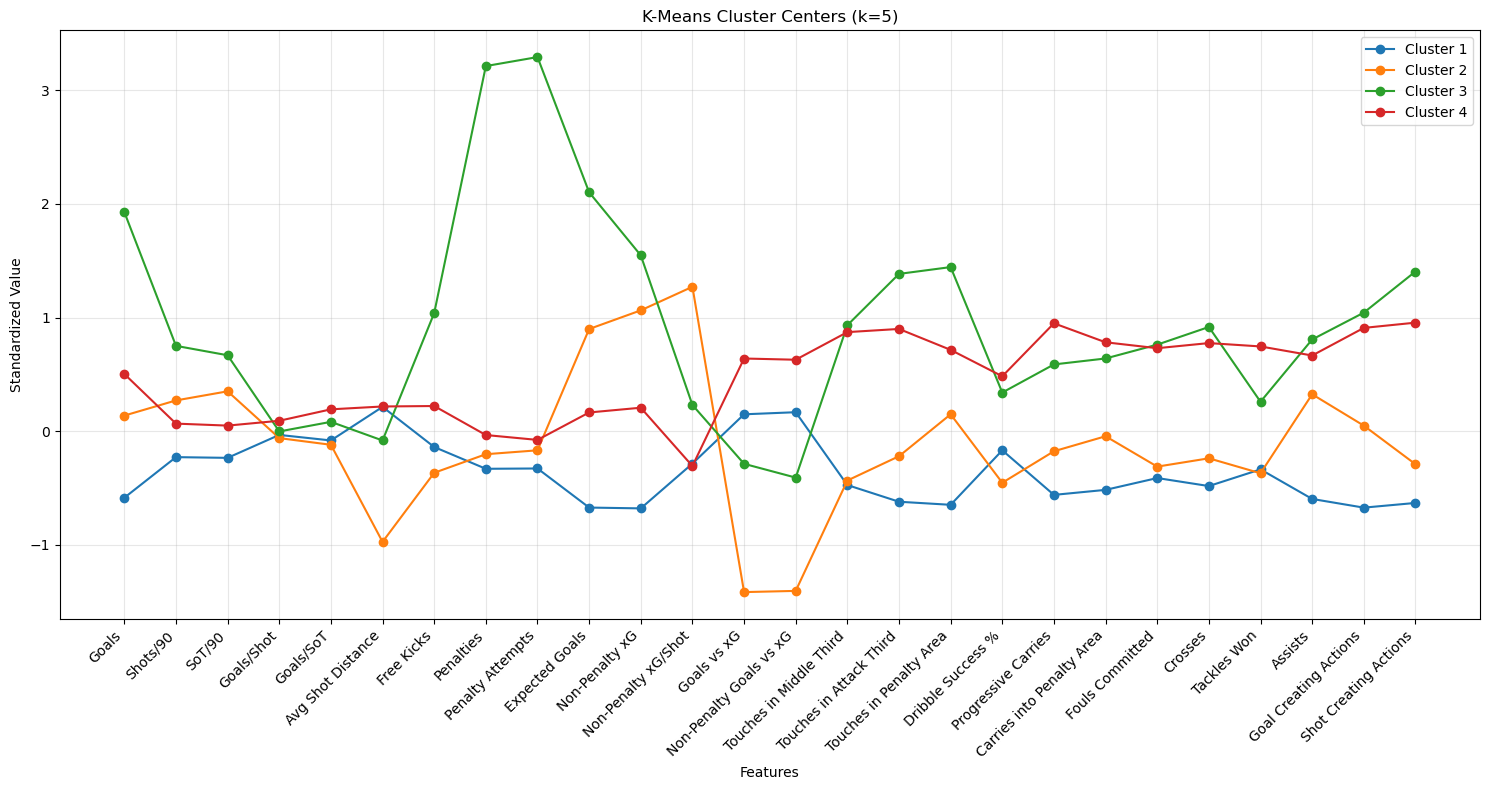

In [102]:
# Run K-Means with 4 clusters
K = 4
kmeans5 = KMeans(n_clusters=K, random_state=22, n_init=22, max_iter=20)
kmeans5.fit(X_scaled)

km_centers = pd.DataFrame(kmeans5.cluster_centers_, 
                         columns=predictor_features)

# Cluster labels
km_centers['Cluster'] = [f'Cluster {i+1}' for i in range(K)]

# Melt for plotting
km_centers_melted = km_centers.melt(id_vars=['Cluster'], 
                                  var_name='feature', 
                                  value_name='z_val')

# More readable feature names
feature_names = {
    'Standard Gls': 'Goals',
    'Standard Sh/90': 'Shots/90',
    'Standard SoT/90': 'SoT/90',
    'Standard G/Sh': 'Goals/Shot',
    'Standard G/SoT': 'Goals/SoT',
    'Standard Dist': 'Avg Shot Distance',
    'Standard FK': 'Free Kicks',
    'Standard PK': 'Penalties',
    'Standard PKatt': 'Penalty Attempts',
    'Expected xG': 'Expected Goals',
    'Expected npxG': 'Non-Penalty xG',
    'Expected npxG/Sh': 'Non-Penalty xG/Shot',
    'Expected G-xG': 'Goals vs xG',
    'Expected np:G-xG': 'Non-Penalty Goals vs xG',
    'Touches Mid 3rd': 'Touches in Middle Third',
    'Touches Att 3rd': 'Touches in Attack Third',
    'Touches Att Pen': 'Touches in Penalty Area',
    'Take-Ons Succ%': 'Dribble Success %',
    'Carries PrgC': 'Progressive Carries',
    'Carries CPA': 'Carries into Penalty Area',
    'Performance Fls': 'Fouls Committed',
    'Performance Crs': 'Crosses',
    'Performance TklW': 'Tackles Won',
    'Ast': 'Assists',
    'GCA GCA': 'Goal Creating Actions',
    'SCA SCA': 'Shot Creating Actions'
}

# map
km_centers_melted['feature'] = km_centers_melted['feature'].map(feature_names)

# Plot
plt.figure(figsize=(15, 8))
for cluster in range(K):
    cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {cluster+1}']
    plt.plot(cluster_data['feature'], cluster_data['z_val'], 
            marker='o', label=f'Cluster {cluster+1}')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Standardized Value')
plt.title('K-Means Cluster Centers (k=5)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

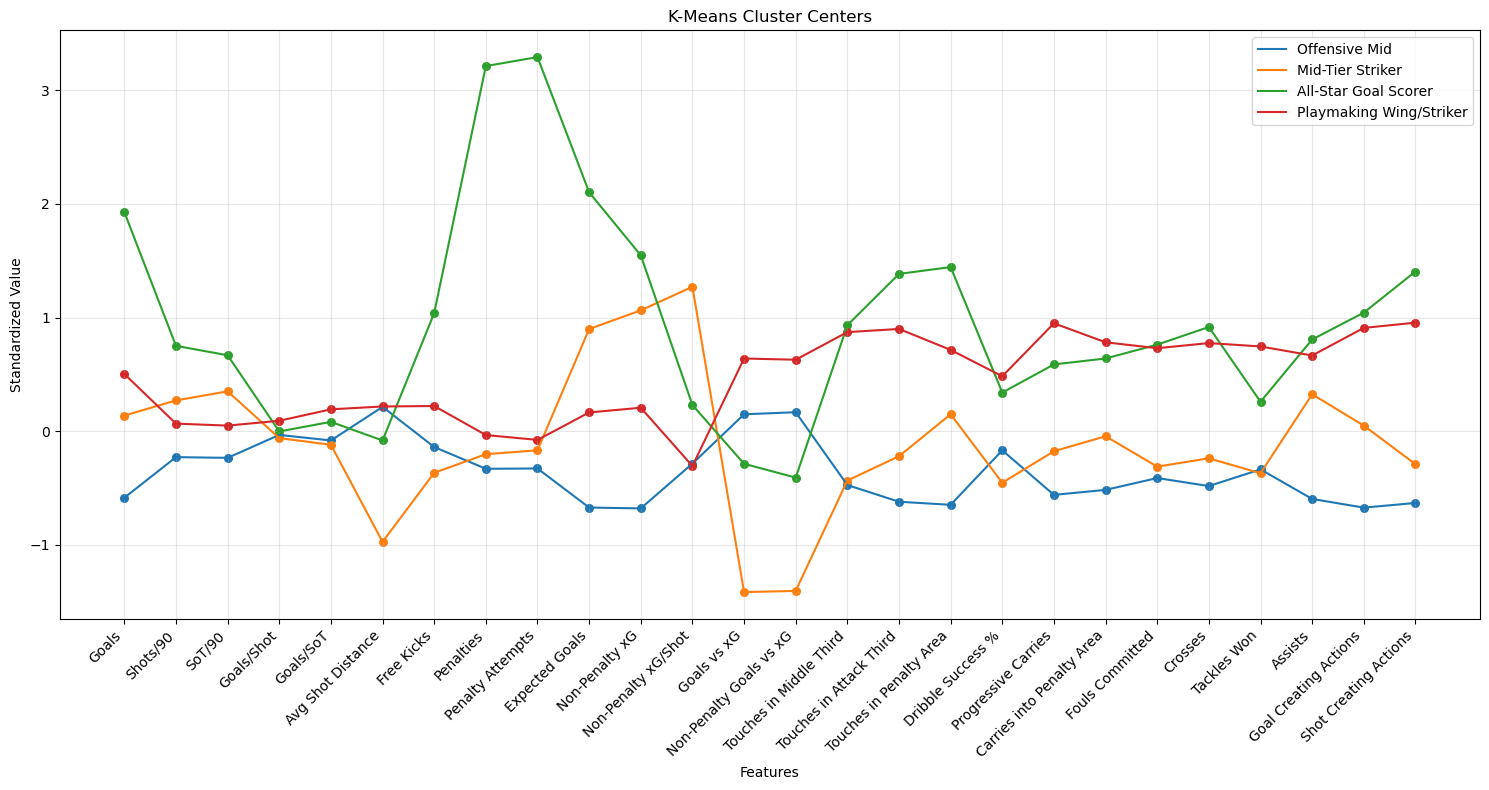

In [106]:
# Plot
plt.figure(figsize=(15, 8))

# Define colors for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # You can modify these colors

# Define cluster names
cluster_names = [
    'Offensive Mid',
    'Mid-Tier Striker',
    'All-Star Goal Scorer',
    'Playmaking Wing/Striker'
]

for cluster in range(K):
    cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {cluster+1}']
    plt.plot(cluster_data['feature'], cluster_data['z_val'], 
            color=colors[cluster], label=cluster_names[cluster])
    plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
               color=colors[cluster], s=30)  # Reduced dot size to 30

plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Standardized Value')
plt.title('K-Means Cluster Centers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

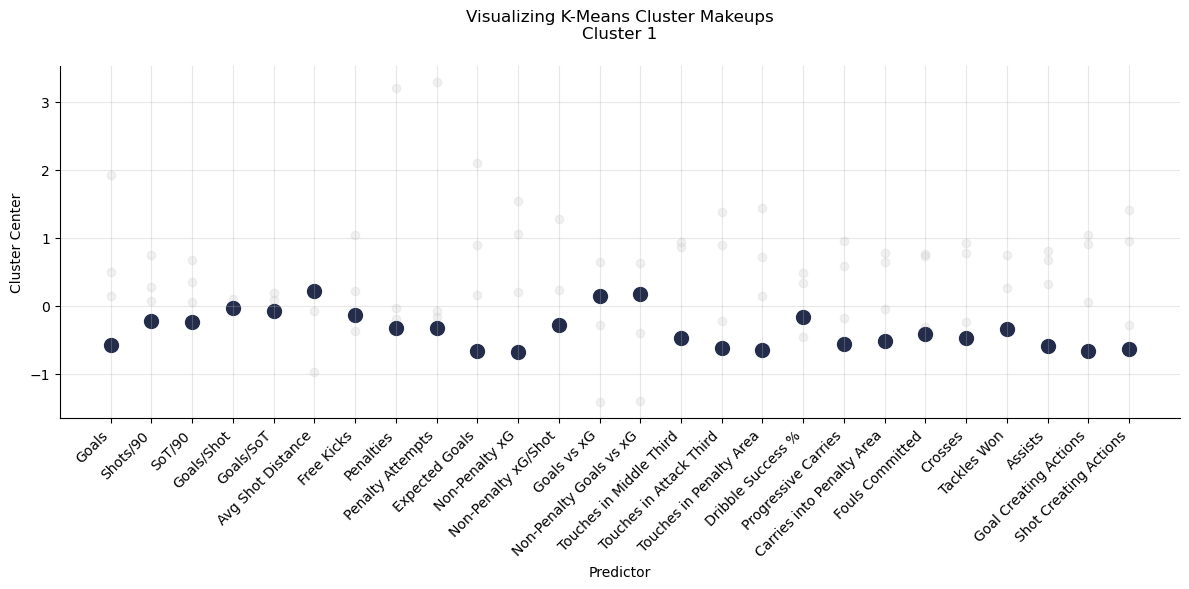

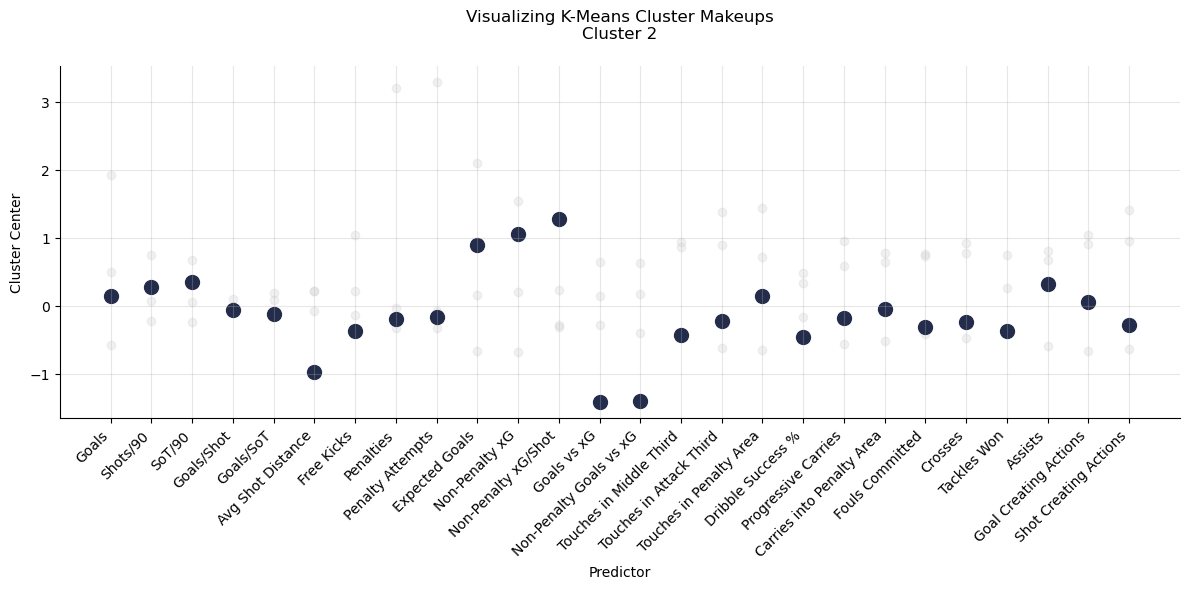

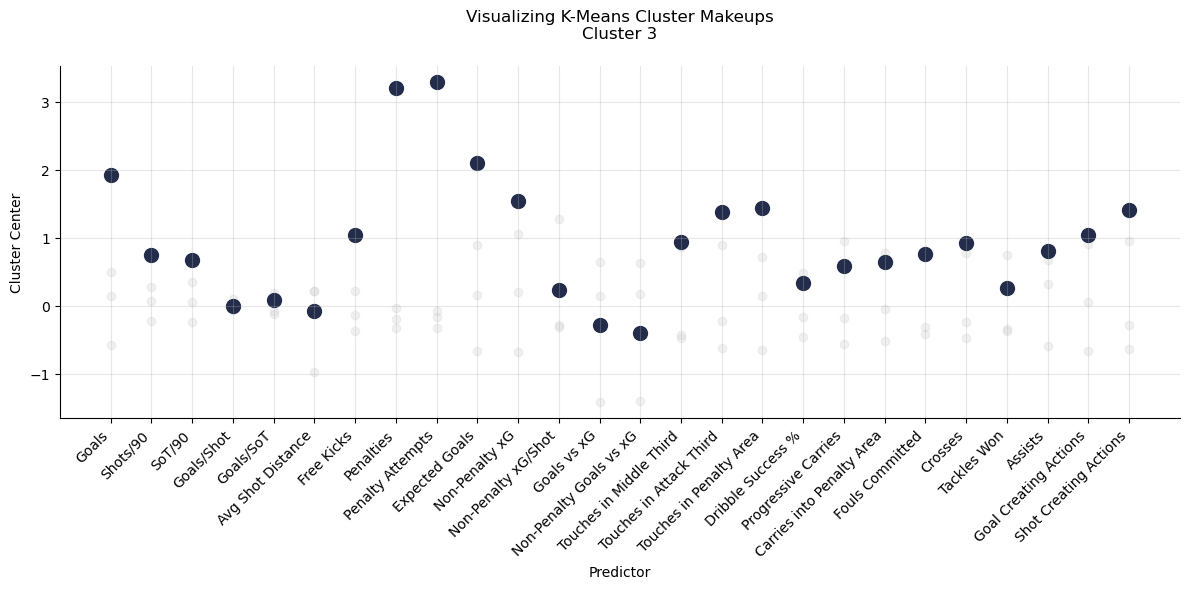

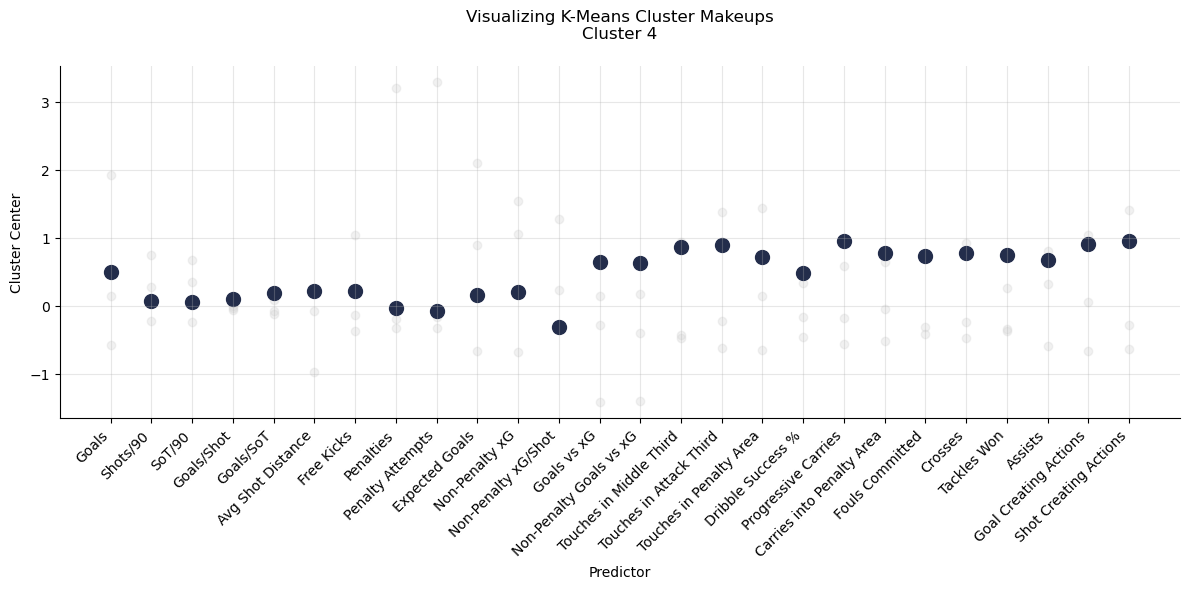

In [103]:
# Create plot
for i in range(K):
    plt.figure(figsize=(12, 6))
    
    # Plot all clusters
    for cluster in range(K):
        cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {cluster+1}']
        plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
                   color='lightgray', alpha=0.3)
    
    # Bold the current cluster
    cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {i+1}']
    plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
               color='#232D4B', s=100)  # s=100 makes the points a bit larger
    
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Predictor')
    plt.ylabel('Cluster Center')
    plt.title(f'Visualizing K-Means Cluster Makeups\nCluster {i+1}', pad=20)
    
    # Customize appearance
    plt.grid(True, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

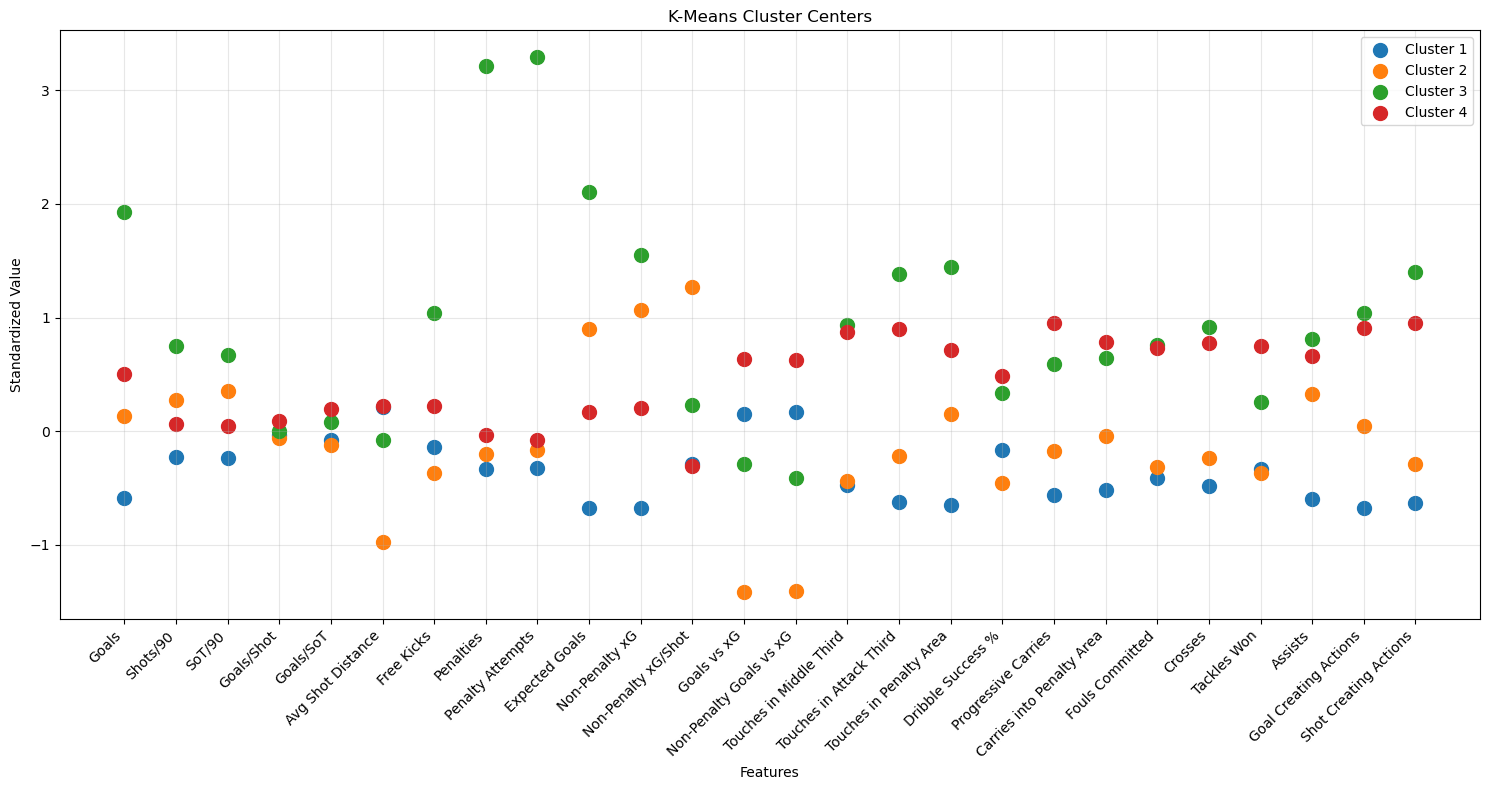

In [105]:
# Plot
plt.figure(figsize=(15, 8))

# Define colors for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # You can modify these colors

for cluster in range(K):
    cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {cluster+1}']
    plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
               color=colors[cluster], label=f'Cluster {cluster+1}', s=100)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Standardized Value')
plt.title('K-Means Cluster Centers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [104]:
df_copy.dropna(inplace=True)
# Add cluster labels to df_copy
df_copy['Cluster'] = kmeans5.labels_

# Display players in each cluster
for i in range(K):
    print(f"\nCluster {i+1} Players:")
    cluster_players = df_copy[df_copy['Cluster'] == i][['Player', 'Squad']].sort_values('Player')
    print(cluster_players.to_string(index=False))


Cluster 1 Players:
                 Player           Squad
           Aaron Ramsey         Burnley
           Adam Lallana        Brighton
    Aleksandar Mitrović          Fulham
            Amad Diallo  Manchester Utd
          Anass Zaroury         Burnley
        Andros Townsend      Luton Town
            André Gomes         Everton
              Ansu Fati        Brighton
        Anthony Martial  Manchester Utd
                 Antony  Manchester Utd
         Arnaut Danjuma         Everton
           Ben Brereton   Sheffield Utd
             Bobby Reid          Fulham
           Bénie Traoré   Sheffield Utd
     Carney Chukwuemeka         Chelsea
     Christopher Nkunku         Chelsea
          Danny Welbeck        Brighton
     David Datro Fofana         Burnley
           Divock Origi Nott'ham Forest
          Eddie Nketiah         Arsenal
         Elijah Adebayo      Luton Town
        Elliot Anderson   Newcastle Utd
          Evan Ferguson        Brighton
           Fabio Vie

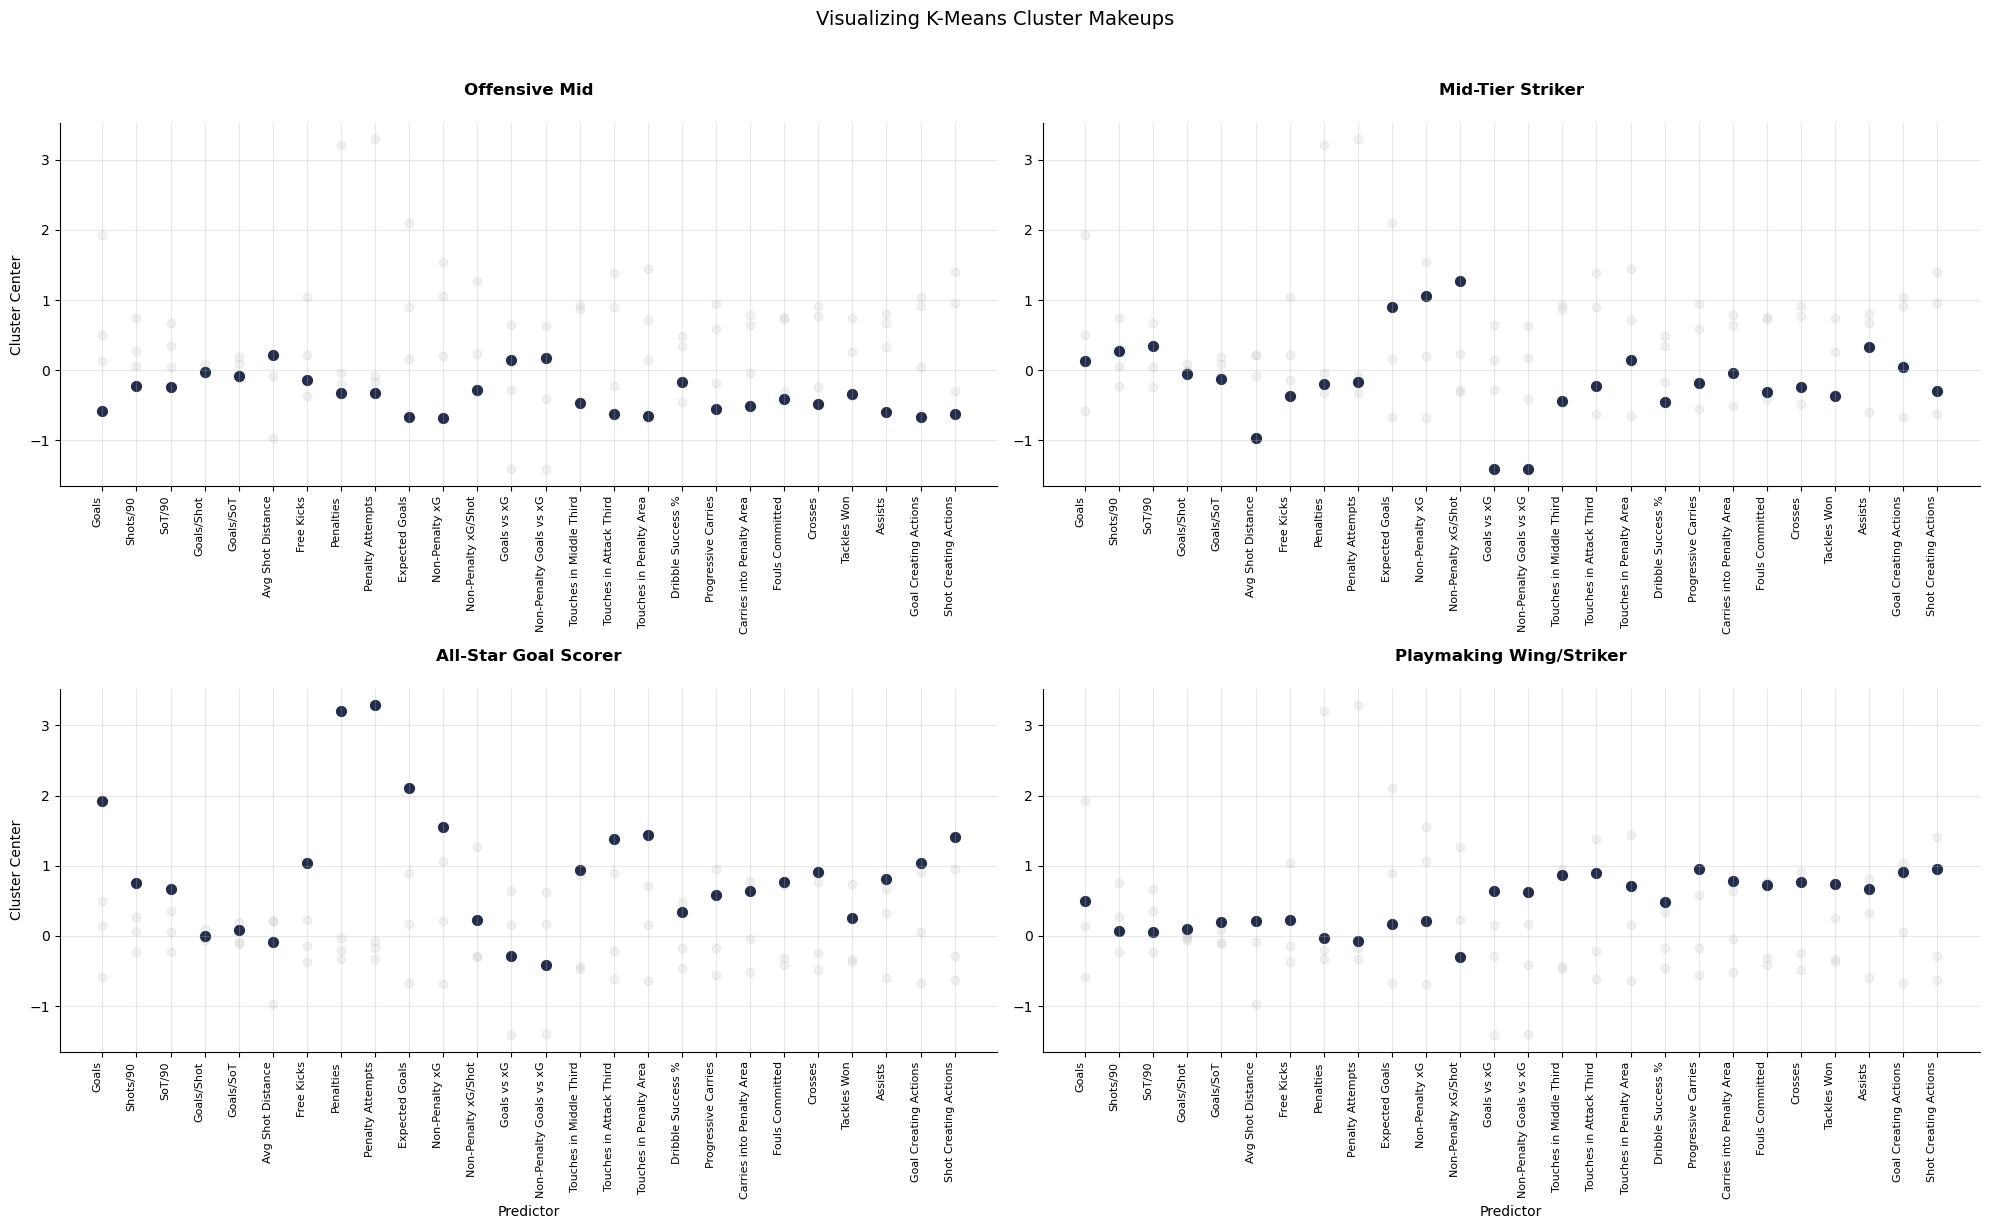

In [107]:
# Create the faceted plot
plt.figure(figsize=(20, 12))

# Define cluster names
cluster_names = [
    'Offensive Mid',
    'Mid-Tier Striker',
    'All-Star Goal Scorer',
    'Playmaking Wing/Striker'
]

# Create subplot for each cluster
for i in range(K):
    plt.subplot(2, 2, i+1)  # 2x2 grid of subplots
    
    # Plot all clusters in light gray
    for cluster in range(K):
        cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {cluster+1}']
        plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
                   color='lightgray', alpha=0.3)
    
    # Highlight current cluster
    cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {i+1}']
    plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
               color='#232D4B', s=50)
    
    plt.xticks(rotation=90, ha='right', size=8)
    plt.grid(True, alpha=0.3)
    plt.title(cluster_names[i], pad=20, fontweight='bold')
    
    # Only show y-label on left plots
    if i % 2 == 0:
        plt.ylabel('Cluster Center')
    
    # Only show x-label on bottom plots
    if i >= 2:
        plt.xlabel('Predictor')
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.suptitle('Visualizing K-Means Cluster Makeups', y=1.02, size=14)
plt.tight_layout()
plt.show()

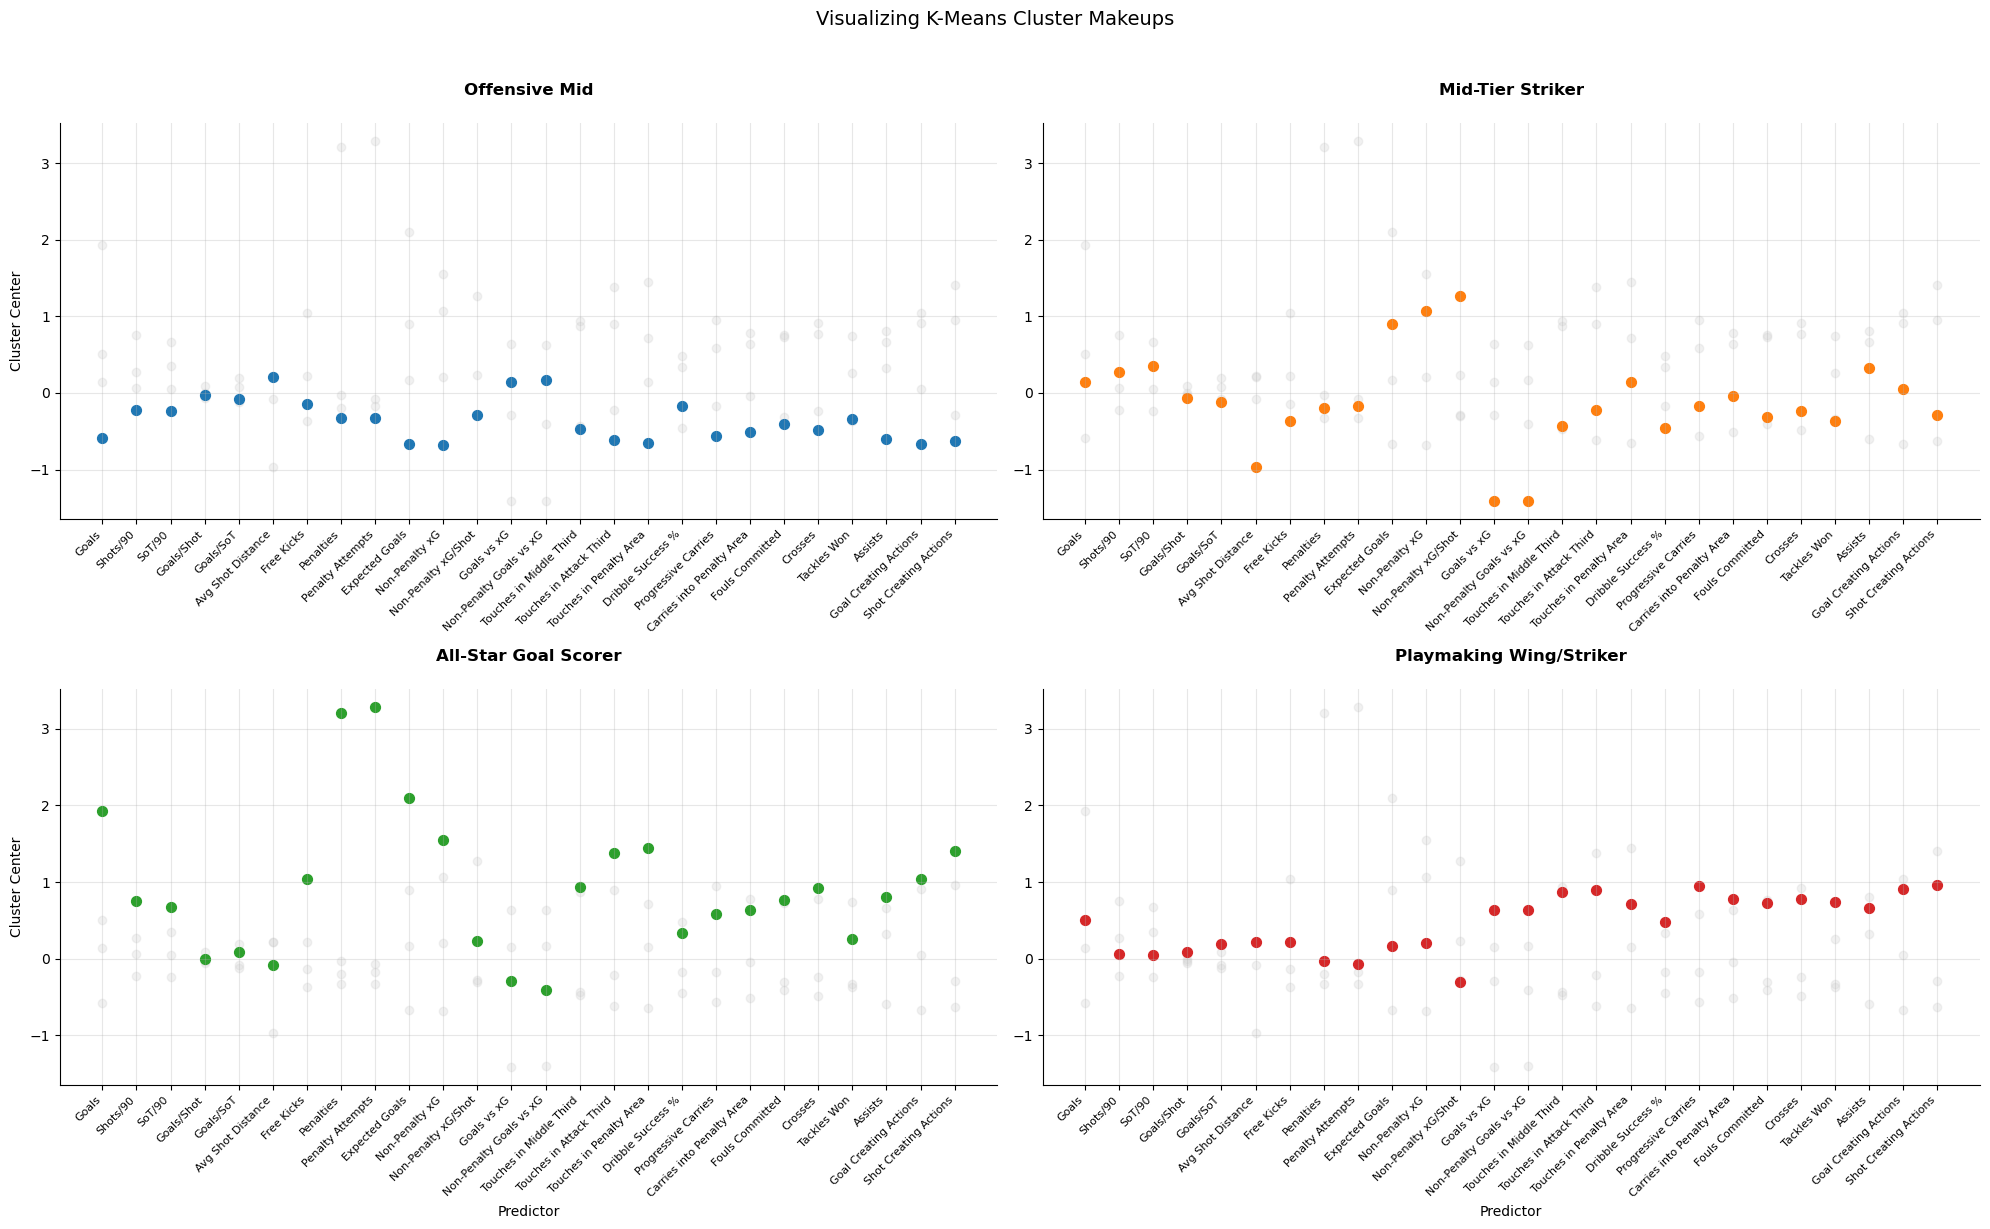

In [108]:
# Create the faceted plot
plt.figure(figsize=(20, 12))

# Define cluster names
cluster_names = [
    'Offensive Mid',
    'Mid-Tier Striker',
    'All-Star Goal Scorer',
    'Playmaking Wing/Striker'
]

# Define colors for each cluster
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create subplot for each cluster
for i in range(K):
    plt.subplot(2, 2, i+1)  # 2x2 grid of subplots
    
    # Plot all clusters in light gray
    for cluster in range(K):
        cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {cluster+1}']
        plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
                   color='lightgray', alpha=0.3)
    
    # Highlight current cluster
    cluster_data = km_centers_melted[km_centers_melted['Cluster'] == f'Cluster {i+1}']
    plt.scatter(cluster_data['feature'], cluster_data['z_val'], 
               color=cluster_colors[i], s=50)
    
    plt.xticks(rotation=45, ha='right', size=8)  # Changed to 45 degree angle
    plt.grid(True, alpha=0.3)
    plt.title(cluster_names[i], pad=20, fontweight='bold')
    
    # Only show y-label on left plots
    if i % 2 == 0:
        plt.ylabel('Cluster Center')
    
    # Only show x-label on bottom plots
    if i >= 2:
        plt.xlabel('Predictor')
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.suptitle('Visualizing K-Means Cluster Makeups', y=1.02, size=14)
plt.tight_layout()
plt.show()